In [2]:
%matplotlib inline

import dicom
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from glob import glob

dsb_path = "/home/anon/kaggle_dsb/1/study/"
label_path = "/home/anon/regional_label/train/1/study/"
subdirs = glob(label_path + '/*/')
labels = []
images = []

for subdir in subdirs:
    images_path = glob(subdir + '/*')
    for image_path in images_path:
        dicom_end_path = image_path[image_path.rfind('/study/') + len('/study/'):image_path.rfind('.jpg')]
        dc = dicom.read_file(dsb_path + dicom_end_path + '.dcm')
        image = dc.pixel_array
        images.append(image)
        img=mpimg.imread(image_path)
        labels.append(img)

# for i in range(40):
#     fig, ax = plt.subplots(figsize=(10, 8))
#     plt.imshow(images[i])
#     plt.show()
#     fig, ax = plt.subplots(figsize=(10, 8))
#     plt.imshow(labels[i])
#     plt.show()
print(len(images))
print(len(labels))

210
210


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   5   0   0   1 117 121 120 119 121 118 118 121 120 119 100  99
  100 100 101   0   0   0   0   1   0   0   1   0   0   0   0   1   0   1
    0   0   0   0]
 [  0   1   0   0 116 122 119 121 119 120 118 123 120 120 121 119 101  99
  101 100  98  99 101 101 101   0   0   3   2   0   5   0   0   0   3   0
    0   0   0   0]
 [  0   1   1 120 123 122 119 118 120 121 119 120 121 118 121 118 100  98
  101 100 101 103 100  96 105  97 102   0   0   2   1   0   4   0   0   2
    0   0   0   0]
 [  2   2 116 122 118 119 119 121 121 120 120 118 121 118 121 120 100  99
  100 100  98 101  98  99 102  99  99 100   0   1   0   3   0   0   0   0
    0   0   0   0

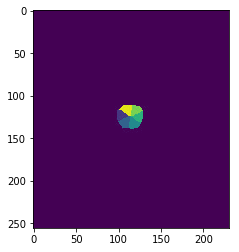

In [11]:
np.set_printoptions(threshold=np.nan)
print(labels[100][110:140, 100:140])
plt.imshow(labels[100])